In [24]:
import functions as f
from matplotlib import pyplot as plt
import numpy as np
from skimage import color
from skimage import io

 Define used functions

In [25]:
#if the structuring element is equal to the kernel at (a, b) and the SE doesnt consists of ignored pixels,  the necessary condition for erosion at pixel (a, b) is fulfilled
def erosion(mat,se):
    if se == mat:
        return True


#if the kernelsumm at (a, b) is grater than 0 with the structuring element at the same size as the kernel, the necessary condition for dilation at pixel (a, b) is fulfilled
def dialtion(mat):
    if np.array(mat).sum()!=0:
        return True

Get Image data and convert it to Binary (split 0 and 1(or 255) at "halfmax")

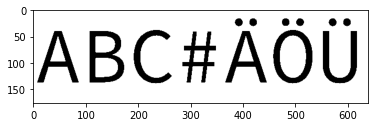

In [26]:
imgi = io.imread('Test.png')[:,:,:3]
imgg = color.rgb2gray(imgi)
halfmax = np.max(imgg)/2
imgbw=np.where(imgg>halfmax, 255, 0)
plt.imshow(imgbw,cmap="gray")

Create an erodet Image and subtract it from the original one to get the boundarys

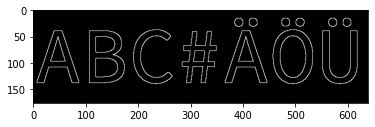

In [27]:
f.boxkernelsize(3)
img = f.mirror_padding(imgbw,f.ksn)
se = list(np.full(f.kernelsize**2,255))
newimg = np.zeros((len(imgbw),len(imgbw[0])))
for a in range(len(newimg)):
    for b in range(len(newimg[0])):
        if erosion(f.neighbours(a+f.ksn,b+f.ksn,img,f.ksn),se):
            newimg[a,b]=255
boundary = imgbw-newimg
plt.imshow(boundary,cmap="gray")

Take the erodet Image and expand the boundarys via dilation

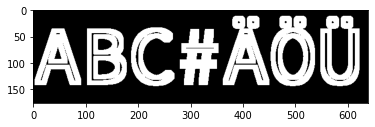

In [28]:
f.boxkernelsize(9)
boundarymirr = f.mirror_padding(boundary,f.ksn)
newimg2 = np.zeros((len(boundary),len(boundary[0])))
for a in range(len(newimg2)):
    for b in range(len(newimg2[0])):
        if dialtion(f.neighbours(a+f.ksn,b+f.ksn,boundarymirr,f.ksn)):
            newimg2[a,b]=255
plt.imshow(newimg2,cmap="gray")